# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, load the data and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
# Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [8]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:13:07   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10plus                                        122.9923      5.753     21.378      0.000     111.715     134.270
ages_10_14                                         -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10_16                                         -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10_21                                          55.9674      6.415      8.725      0.000      43.393      68.542
ages_11_16                                         -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12plus                                         70.5837      4.828     14.619      0.000      61.119      80.048
ages_12_16                                         -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14plus                                         24.6493      3.579      6.887      0.000      17.634      31.665
ages_16plus                                         32.9512      5.251      6.275      0.000      22.658      43.245
ages_1half_3                                        -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1half_5                                        -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2_5                                            14.9724      1.459     10.260      0.000      12.112      17.833
ages_4plus                                         -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4_7                                            -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4_99                                           -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5plus                                          -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5_12                                          -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [9]:
# Subset pvalues result to only those less than .05
low_pvalues = model.pvalues[model.pvalues < 0.05]

# "Intercept" may be a low p-value but is not a valid column for the formula
low_pvalues.drop("Intercept", axis=0, errors="ignore", inplace=True)
low_pvalues

piece_count                           0.000000e+00
num_reviews                           1.819804e-27
play_star_rating                      3.160824e-22
star_rating                           1.978538e-02
val_star_rating                       6.565959e-54
                                          ...     
country_US                            1.773072e-08
review_difficulty_Average             4.491864e-27
review_difficulty_Challenging         5.588075e-24
review_difficulty_Easy                3.730231e-02
review_difficulty_Very_Challenging    2.147521e-03
Length: 76, dtype: float64

In [10]:
# Update the value of x_cols to match the index of that series
x_cols = low_pvalues.index.values
x_cols

array(['piece_count', 'num_reviews', 'play_star_rating', 'star_rating',
       'val_star_rating', 'ages_10plus', 'ages_10_14', 'ages_10_16',
       'ages_10_21', 'ages_11_16', 'ages_12plus', 'ages_12_16',
       'ages_14plus', 'ages_16plus', 'ages_1half_3', 'ages_2_5',
       'ages_4plus', 'ages_4_7', 'ages_5plus', 'ages_5_12', 'ages_6plus',
       'ages_6_12', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12',
       'ages_8_14', 'ages_9plus', 'ages_9_12', 'ages_9_14',
       'theme_name_Architecture', 'theme_name_BOOST',
       'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz',
       'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City',
       'theme_name_Classic', 'theme_name_Creator_Expert',
       'theme_name_DC_Comics_Super_Heroes', 'theme_name_DIMENSIONS',
       'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney',
       'theme_name_Ghostbusters', 'theme_name_Ideas',
       'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
       'theme_nam

In [11]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     910.4
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:13:18   Log-Likelihood:                -54063.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10794   BIC:                         1.088e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7562      2.106     30.747      0.000      60.628      68.884
piece_count                                         75.7688      0.763     99.312      0.000      74.273      77.264
num_reviews                                          6.5022      0.585     11.111      0.000       5.355       7.649
play_star_rating                                     5.4112      0.531     10.190      0.000       4.370       6.452
star_rating                                         -1.4588      0.606     -2.406      0.016      -2.647      -0.271
val_star_rating                                     -8.4947      0.528    -16.084      0.000      -9.530      -7.459
ages_10plus                                        128.2005      6.586     19.465      0.000     115.291     141.110
ages_10_14                                         -19.3577      8.201     -2.360      0.018     -35.434      -3.281
ages_10_16                                          -8.7326      3.680     -2.373      0.018     -15.947      -1.519
ages_10_21                                          61.6708      7.062      8.733      0.000      47.829      75.513
ages_11_16                                         -15.5409      5.126     -3.032      0.002     -25.590      -5.492
ages_12plus                                         75.0700      5.737     13.085      0.000      63.824      86.316
ages_12_16                                         -54.0781      6.335     -8.536      0.000     -66.496     -41.660
ages_14plus                                         28.5356      4.315      6.613      0.000      20.078      36.993
ages_16plus                                         36.2814      6.010      6.037      0.000      24.501      48.061
ages_1half_3                                        -3.6613      3.116     -1.175      0.240      -9.769       2.446
ages_2_5                                            20.0271      2.309      8.673      0.000      15.501      24.553
ages_4plus                                         -16.2515      8.435     -1.927      0.054     -32.786       0.283
ages_4_7                                            -2.5732      2.415     -1.065      0.287      -7.307       2.161
ages_5plus                                          -8.3651      2.773     -3.017      0.003     -13.801      -2.930
ages_5_12                                          -30.5511      2.755    -11.090      0.000     -35.951     -25.151
ages_6plus                                         -22.6151      5.048     -4.480      0.000     -32.510     -12.721
ages_6_12                                          -17.8101      2.201     -8.093      0.000     -22.124     -13.497
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [12]:
# Extract the p-value table from the model and use it to subset our features
low_pvalues = model.pvalues[model.pvalues < 0.05]
low_pvalues.drop("Intercept", axis=0, errors="ignore", inplace=True)
x_cols = low_pvalues.index.values
x_cols

array(['piece_count', 'num_reviews', 'play_star_rating', 'star_rating',
       'val_star_rating', 'ages_10plus', 'ages_10_14', 'ages_10_16',
       'ages_10_21', 'ages_11_16', 'ages_12plus', 'ages_12_16',
       'ages_14plus', 'ages_16plus', 'ages_2_5', 'ages_5plus',
       'ages_5_12', 'ages_6plus', 'ages_6_12', 'ages_7_12', 'ages_7_14',
       'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus', 'ages_9_12',
       'ages_9_14', 'theme_name_Architecture', 'theme_name_BOOST',
       'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz',
       'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City',
       'theme_name_Classic', 'theme_name_Creator_Expert',
       'theme_name_DC_Comics_Super_Heroes', 'theme_name_DIMENSIONS',
       'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney',
       'theme_name_Ghostbusters', 'theme_name_Ideas',
       'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
       'theme_name_MINDSTORMS', 'theme_name_Marvel_Super_Heroes',


In [13]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1003.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:13:23   Log-Likelihood:                -54070.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10801   BIC:                         1.088e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6758      1.215     52.404      0.000      61.294      66.058
piece_count                                         75.8262      0.763     99.417      0.000      74.331      77.321
num_reviews                                          6.1455      0.552     11.142      0.000       5.064       7.227
play_star_rating                                     5.5014      0.529     10.391      0.000       4.464       6.539
star_rating                                         -1.4314      0.601     -2.382      0.017      -2.609      -0.253
val_star_rating                                     -8.6042      0.523    -16.437      0.000      -9.630      -7.578
ages_10plus                                        129.5614      6.451     20.085      0.000     116.917     142.206
ages_10_14                                         -17.4870      8.072     -2.166      0.030     -33.309      -1.665
ages_10_16                                          -6.5432      3.331     -1.964      0.050     -13.072      -0.014
ages_10_21                                          62.8400      6.969      9.017      0.000      49.179      76.501
ages_11_16                                         -13.3548      4.886     -2.733      0.006     -22.932      -3.777
ages_12plus                                         76.6355      5.630     13.613      0.000      65.600      87.671
ages_12_16                                         -51.7495      6.165     -8.393      0.000     -63.835     -39.664
ages_14plus                                         31.2107      4.103      7.607      0.000      23.168      39.253
ages_16plus                                         38.9612      5.868      6.639      0.000      27.458      50.464
ages_2_5                                            21.9668      1.641     13.383      0.000      18.749      25.184
ages_5plus                                          -7.4825      2.645     -2.829      0.005     -12.667      -2.298
ages_5_12                                          -28.2777      2.274    -12.437      0.000     -32.734     -23.821
ages_6plus                                         -20.2011      4.793     -4.214      0.000     -29.597     -10.805
ages_6_12                                          -15.4143      1.549     -9.954      0.000     -18.450     -12.379
ages_7_12                                          -14.4029      1.845     -7.804      0.000     -18.020     -10.785
ages_7_14                                          -10.7496      1.639     -6.560      0.000     -13.962      -7.537
ages_8plus                                          19.1774      4.312      4.448      0.000      10.725      27.629
ages_8_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [14]:
# Your code here
X = sm.add_constant(df[x_cols])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 13.018184596933054),
 ('num_reviews', 5.12869902507746),
 ('play_star_rating', 2.682125498567454),
 ('star_rating', 2.4713929327559865),
 ('val_star_rating', 3.1836314680390383),
 ('ages_10plus', 2.4157690953830655),
 ('ages_10_14', 17.139152054395865),
 ('ages_10_16', 1.107649397104949),
 ('ages_10_21', 1.3137720559075943),
 ('ages_11_16', 7.126030568739189),
 ('ages_12plus', 1.2703171934133504),
 ('ages_12_16', 7.451020679015672),
 ('ages_14plus', 1.2900186132996045),
 ('ages_16plus', 2.562406811766864),
 ('ages_2_5', 10.736674795983843),
 ('ages_5plus', 1.5765826621958199),
 ('ages_5_12', inf),
 ('ages_6plus', 3.4297636769078186),
 ('ages_6_12', 2.7206548227576697),
 ('ages_7_12', 2.4813581470641894),
 ('ages_7_14', 1.8357151823902234),
 ('ages_8plus', 2.3575907898689374),
 ('ages_8_12', 3.337375122969466),
 ('ages_8_14', 1.5062462953738889),
 ('ages_9plus', 2.417415879686907),
 ('ages_9_12', 1.5635892270420046),
 ('ages_9_14', 1.0542609944174242),
 ('theme_name_Arc

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [15]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

69 58


In [16]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     435.7
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:13:36   Log-Likelihood:                -58403.
No. Observations:               10870   AIC:                         1.169e+05
Df Residuals:                   10812   BIC:                         1.173e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           28.9738      1.275     22.722      0.000      26.474      31.473
play_star_rating                                     5.2404      0.782      6.700      0.000       3.707       6.774
star_rating                                          1.3554      0.881      1.538      0.124      -0.372       3.083
val_star_rating                                     -9.5710      0.775    -12.346      0.000     -11.091      -8.051
ages_10plus                                        172.4653      9.357     18.431      0.000     154.123     190.807
ages_10_16                                          48.3372      4.639     10.420      0.000      39.244      57.431
ages_10_21                                         123.2269     10.216     12.062      0.000     103.201     143.253
ages_12plus                                        265.4462      7.701     34.469      0.000     250.351     280.542
ages_14plus                                        203.6098      4.803     42.396      0.000     194.196     213.024
ages_16plus                                        408.3636      6.024     67.789      0.000     396.555     420.172
ages_5plus                                         -13.1862      3.896     -3.384      0.001     -20.824      -5.549
ages_6plus                                         -18.2019      6.966     -2.613      0.009     -31.857      -4.547
ages_6_12                                           -6.3528      1.773     -3.583      0.000      -9.828      -2.878
ages_7_12                                            1.4681      2.379      0.617      0.537      -3.195       6.132
ages_7_14                                           -7.6057      2.072     -3.671      0.000     -11.667      -3.545
ages_8plus                                          58.6190      6.337      9.250      0.000      46.197      71.041
ages_8_12                                           13.8381      3.195      4.331      0.000       7.574      20.102
ages_8_14                                            2.6520      2.273      1.167      0.243      -1.804       7.108
ages_9plus                                         193.5590     13.941     13.884      0.000     166.232     220.886
ages_9_12                                           16.3535      7.997      2.045      0.041       0.677      32.030
ages_9_14                                           38.9569      3.216     12.112      0.000      32.652      45.262
theme_name_Architecture                           -259.8303      8.405    -30.912      0.000    -276.306    -243.354
theme_name_Blues_Helicopter_Pursuit                 30.4152     11.622      2.617      0.009       7.634      53.197
theme_name_BrickHeadz                    

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

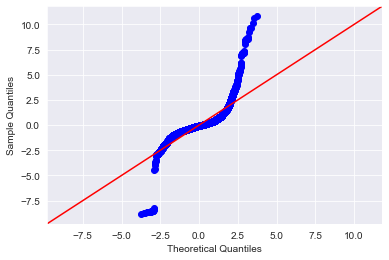

In [17]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

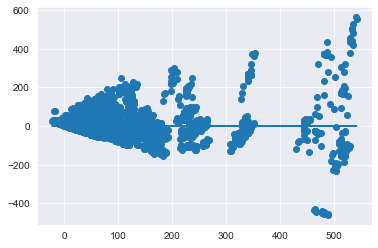

In [18]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))]);

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

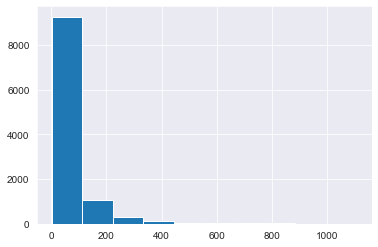

In [19]:
df.list_price.hist();

In [20]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [21]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     413.9
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:13:44   Log-Likelihood:                -54284.
No. Observations:               10756   AIC:                         1.087e+05
Df Residuals:                   10698   BIC:                         1.091e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           29.8800      0.922     32.409      0.000      28.073      31.687
play_star_rating                                     3.4188      0.570      5.997      0.000       2.301       4.536
star_rating                                          1.5001      0.639      2.346      0.019       0.247       2.754
val_star_rating                                     -6.9056      0.561    -12.301      0.000      -8.006      -5.805
ages_10plus                                        108.4961      6.836     15.870      0.000      95.096     121.897
ages_10_16                                          53.8366      3.350     16.070      0.000      47.270      60.404
ages_10_21                                         109.2572      7.457     14.651      0.000      94.639     123.875
ages_12plus                                        203.4178      5.633     36.110      0.000     192.376     214.460
ages_14plus                                        163.9060      3.646     44.958      0.000     156.760     171.052
ages_16plus                                        283.2230      4.863     58.239      0.000     273.690     292.756
ages_5plus                                         -13.2488      2.813     -4.711      0.000     -18.762      -7.736
ages_6plus                                         -27.5163      5.032     -5.469      0.000     -37.379     -17.653
ages_6_12                                           -2.9621      1.281     -2.313      0.021      -5.473      -0.452
ages_7_12                                            7.0957      1.719      4.127      0.000       3.726      10.466
ages_7_14                                           -6.6875      1.496     -4.471      0.000      -9.619      -3.756
ages_8plus                                          45.9351      4.588     10.012      0.000      36.942      54.929
ages_8_12                                           18.6634      2.309      8.084      0.000      14.138      23.189
ages_8_14                                           11.5614      1.645      7.027      0.000       8.336      14.786
ages_9plus                                         137.0550     10.097     13.574      0.000     117.263     156.847
ages_9_12                                           21.0201      5.773      3.641      0.000       9.703      32.337
ages_9_14                                           50.1506      2.327     21.552      0.000      45.589      54.712
theme_name_Architecture                           -195.7790      6.138    -31.894      0.000    -207.812    -183.747
theme_name_Blues_Helicopter_Pursuit                 24.2718      8.390      2.893      0.004       7.826      40.717
theme_name_BrickHeadz                    

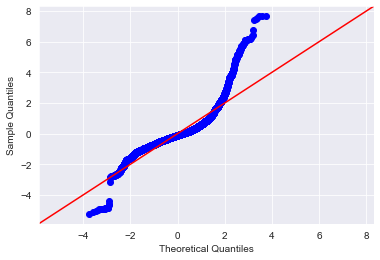

In [22]:
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

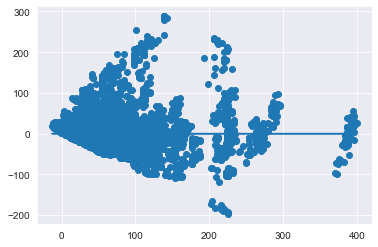

In [23]:
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))]);

0.8 percentile: 85.3878
0.81 percentile: 91.1924
0.82 percentile: 93.92780000000002
0.83 percentile: 97.5878
0.84 percentile: 103.639
0.85 percentile: 109.7878
0.86 percentile: 111.98599999999999
0.87 percentile: 119.99
0.88 percentile: 121.9878
0.89 percentile: 124.752
0.9 percentile: 134.18779999999998
0.91 percentile: 144.9971
0.92 percentile: 155.87
0.93 percentile: 170.7878
0.94 percentile: 182.9878
0.95 percentile: 198.7929
0.96 percentile: 219.5878
0.97 percentile: 251.88
0.98 percentile: 292.4648099999991
0.99 percentile: 355.43709500000074


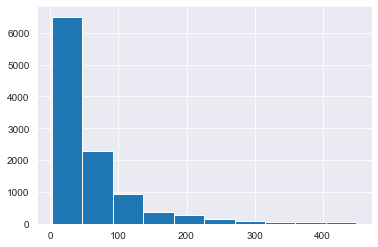

In [24]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist();

In [25]:
df = df[df.list_price <= 6]

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     3.772
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           4.36e-06
Time:                        18:13:52   Log-Likelihood:                -117.28
No. Observations:                 112   AIC:                             280.6
Df Residuals:                      89   BIC:                             343.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            4.7201      0.266     17.721      0.000       4.191       5.249
play_star_rating                                     0.0574      0.152      0.377      0.707      -0.245       0.360
star_rating                                         -0.1482      0.279     -0.532      0.596      -0.702       0.406
val_star_rating                                      0.5969      0.230      2.594      0.011       0.140       1.054
ages_10plus                                      -4.765e-16   1.26e-15     -0.379      0.706   -2.98e-15    2.02e-15
ages_10_16                                        1.681e-16   4.35e-16      0.386      0.700   -6.97e-16    1.03e-15
ages_10_21                                        2.289e-16   2.49e-16      0.920      0.360   -2.66e-16    7.23e-16
ages_12plus                                      -2.265e-16   1.53e-16     -1.477      0.143   -5.31e-16    7.82e-17
ages_14plus                                      -7.403e-16      2e-15     -0.371      0.712   -4.71e-15    3.23e-15
ages_16plus                                       4.184e-17   9.37e-16      0.045      0.964   -1.82e-15     1.9e-15
ages_5plus                                          -0.0241      0.128     -0.188      0.851      -0.278       0.230
ages_6plus                                        -4.88e-16   7.36e-16     -0.663      0.509   -1.95e-15    9.74e-16
ages_6_12                                         1.387e-17   3.03e-16      0.046      0.964   -5.89e-16    6.17e-16
ages_7_12                                          3.35e-16   3.03e-16      1.105      0.272   -2.67e-16    9.37e-16
ages_7_14                                           -0.2646      0.894     -0.296      0.768      -2.040       1.511
ages_8plus                                       -1.827e-16   6.86e-16     -0.266      0.791   -1.55e-15    1.18e-15
ages_8_12                                         2.244e-16   9.23e-16      0.243      0.808   -1.61e-15    2.06e-15
ages_8_14                                         1.081e-16    3.8e-16      0.284      0.777   -6.48e-16    8.64e-16
ages_9plus                                        6.292e-17   2.07e-16      0.304      0.761   -3.48e-16    4.73e-16
ages_9_12                                        -7.524e-17   2.68e-16     -0.281      0.780   -6.08e-16    4.57e-16
ages_9_14                                        -1.797e-16   7.57e-16     -0.238      0.813   -1.68e-15    1.32e-15
theme_name_Architecture                           -3.78e-17   1.19e-16     -0.317      0.752   -2.75e-16    1.99e-16
theme_name_Blues_Helicopter_Pursuit               3.283e-17   1.06e-16      0.311      0.757   -1.77e-16    2.43e-16
theme_name_BrickHeadz                    

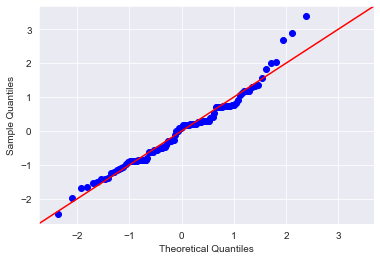

In [26]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# Check the Homoscedasticity Assumption

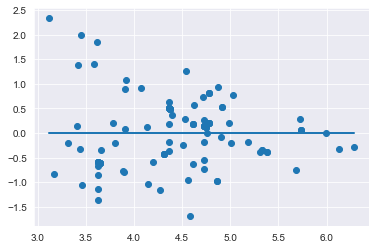

In [27]:
# Comment: No improvement observed
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))]);

In [ ]:
# An Alternative Approach: Building a Model From the Ground Up

In [28]:
x_cols = ['piece_count', 'country_US']

In [29]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     20.18
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           3.51e-08
Time:                        18:14:02   Log-Likelihood:                -136.53
No. Observations:                 112   AIC:                             279.1
Df Residuals:                     109   BIC:                             287.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.2524      1.741      8.761      0.000      11.802      18.703
piece_count    18.4324      2.953      6.241      0.000      12.579      24.286
country_US     -0.0260      0.213     -0.122      0.903      -0.449       0.397
==============================================================================
Omnibus:                       10.134   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.725
Skew:                          -0.263   Prob(JB):                       0.0942
Kurtosis:                       2.143   Cond. No.                         51.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking Assumptions for Simplified Model

In [ ]:
# Check Normality Assumption

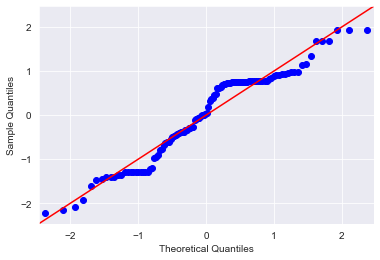

In [30]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# Check Homoscedasticity Assumption

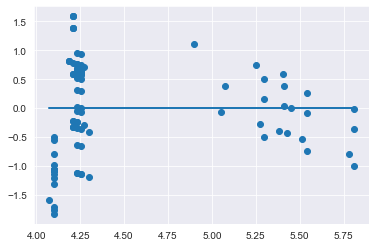

In [31]:
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))]);

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 